In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
df = pd.read_csv("processed_PJME.csv")

In [3]:
df.head()

,Datetime,PJME_MW,hour,dayofweek,month,is_weekend,dayofyear,lag_1,lag_24,lag_168,roll_mean_24,roll_std_24,roll_mean_168
0,2002-01-08 01:00:00,29445.0,1,1,1,0,8,31187.0,26862.0,30393.0,33452.583333,4559.767709,32519.511905
1,2002-01-08 02:00:00,28670.0,2,1,1,0,8,29445.0,25976.0,29265.0,33560.208333,4425.965952,32513.869048
2,2002-01-08 03:00:00,28375.0,3,1,1,0,8,28670.0,25641.0,28357.0,33672.458333,4256.159403,32510.327381
3,2002-01-08 04:00:00,28542.0,4,1,1,0,8,28375.0,25666.0,27899.0,33786.375000,4064.104959,32510.434524
4,2002-01-08 05:00:00,29261.0,5,1,1,0,8,28542.0,26328.0,28057.0,33906.208333,3851.076461,32514.261905


In [4]:
df.columns

Index(['Datetime', 'PJME_MW', 'hour', 'dayofweek', 'month', 'is_weekend',
       'dayofyear', 'lag_1', 'lag_24', 'lag_168', 'roll_mean_24',
       'roll_std_24', 'roll_mean_168'],
      dtype='object')

In [6]:
print("Data Shape:", df.shape)
print(df.info())
print(df.describe().T)

Data Shape: (145224, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145224 entries, 0 to 145223
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Datetime       145224 non-null  object 
 1   PJME_MW        145224 non-null  float64
 2   hour           145224 non-null  int64  
 3   dayofweek      145224 non-null  int64  
 4   month          145224 non-null  int64  
 5   is_weekend     145224 non-null  int64  
 6   dayofyear      145224 non-null  int64  
 7   lag_1          145224 non-null  float64
 8   lag_24         145224 non-null  float64
 9   lag_168        145224 non-null  float64
 10  roll_mean_24   145224 non-null  float64
 11  roll_std_24    145224 non-null  float64
 12  roll_mean_168  145224 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 14.4+ MB
None
                  count          mean          std           min  \
PJME_MW        145224.0  32078.417972  6466.680687  1

In [7]:
# Missing values
missing = df.isna().sum()
print("Missing values:\n", missing[missing > 0])

# Duplicate timestamps
dupes = df.index.duplicated().sum()
print(f"Duplicate timestamps: {dupes}")


Missing values:
 Series([], dtype: int64)
Duplicate timestamps: 0


In [13]:
target_col = 'PJME_MW'

# Replace with your actual datetime column name
datetime_col = 'Datetime'  # or whatever your column is called

# Ensure datetime dtype
df[datetime_col] = pd.to_datetime(df[datetime_col])

# Set as index if not already
if not isinstance(df.index, pd.DatetimeIndex):
    df = df.set_index(datetime_col)


Raw timeseries

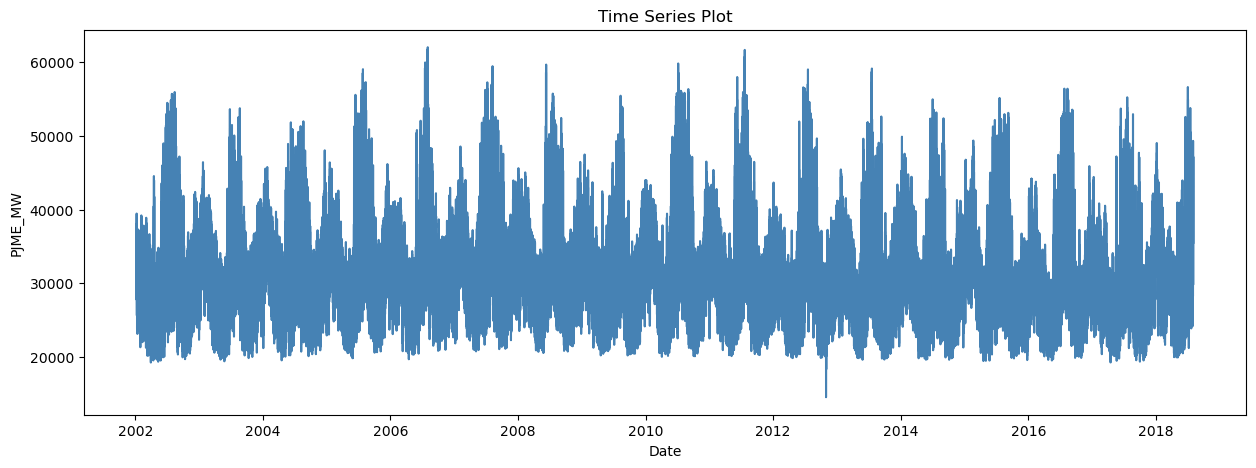

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df[target_col], color='steelblue')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.show()


Seasonal Decomposition

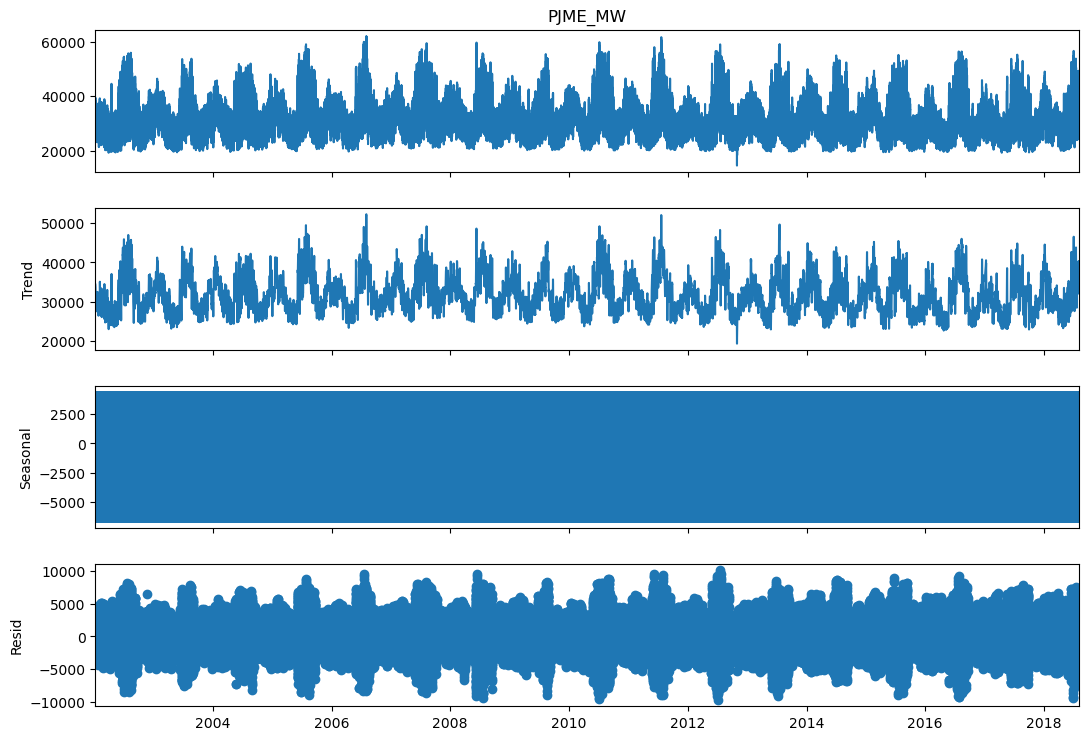

In [15]:
decomposition = seasonal_decompose(df[target_col], model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


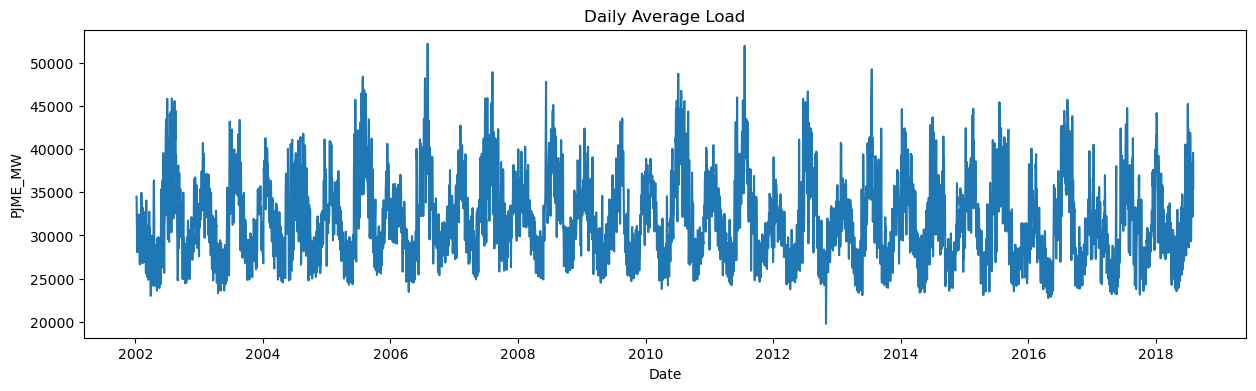

C:\Users\akala\AppData\Local\Temp\ipykernel_22004\1751889196.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df[target_col].resample('M').mean()


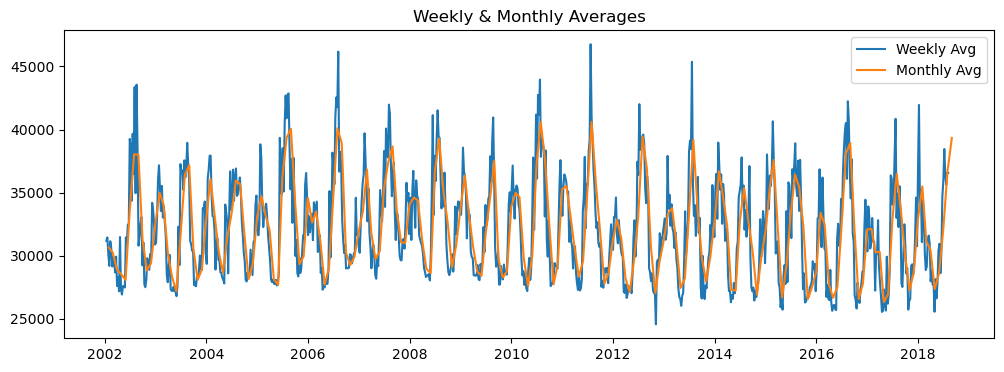

In [16]:
# Daily average
daily = df[target_col].resample('D').mean()

plt.figure(figsize=(15,4))
plt.plot(daily)
plt.title('Daily Average Load')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.show()

# Weekly & monthly averages
weekly = df[target_col].resample('W').mean()
monthly = df[target_col].resample('M').mean()

plt.figure(figsize=(12,4))
plt.plot(weekly, label='Weekly Avg')
plt.plot(monthly, label='Monthly Avg')
plt.legend()
plt.title('Weekly & Monthly Averages')
plt.show()


C:\Users\akala\AppData\Local\Temp\ipykernel_22004\1045039561.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y=target_col, data=df, estimator='mean', ci=None)


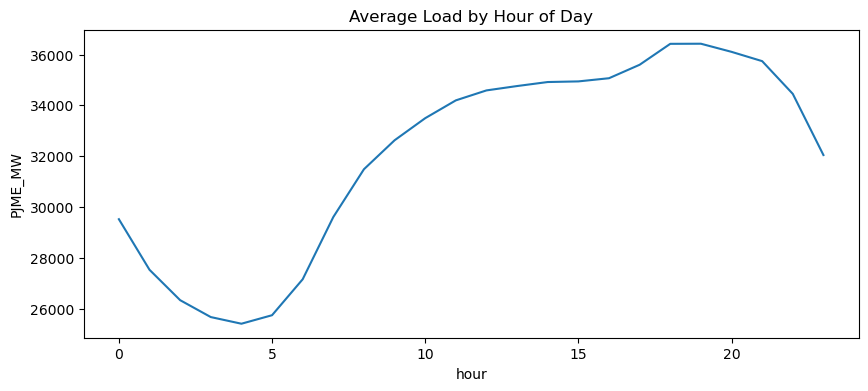

In [17]:
plt.figure(figsize=(10,4))
sns.lineplot(x='hour', y=target_col, data=df, estimator='mean', ci=None)
plt.title('Average Load by Hour of Day')
plt.show()


C:\Users\akala\AppData\Local\Temp\ipykernel_22004\1693924606.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='dayofweek', y=target_col, data=df, estimator='mean', ci=None, palette='crest')
C:\Users\akala\AppData\Local\Temp\ipykernel_22004\1693924606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dayofweek', y=target_col, data=df, estimator='mean', ci=None, palette='crest')


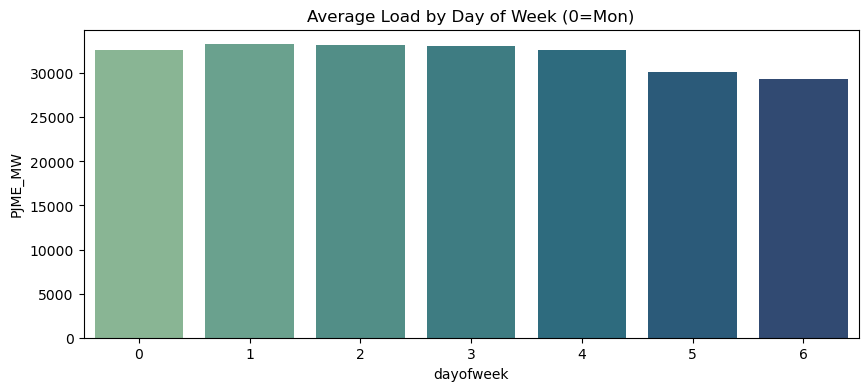

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(x='dayofweek', y=target_col, data=df, estimator='mean', ci=None, palette='crest')
plt.title('Average Load by Day of Week (0=Mon)')
plt.show()


C:\Users\akala\AppData\Local\Temp\ipykernel_22004\3649775142.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y=target_col, data=df, estimator='mean', ci=None, palette='mako')
C:\Users\akala\AppData\Local\Temp\ipykernel_22004\3649775142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y=target_col, data=df, estimator='mean', ci=None, palette='mako')


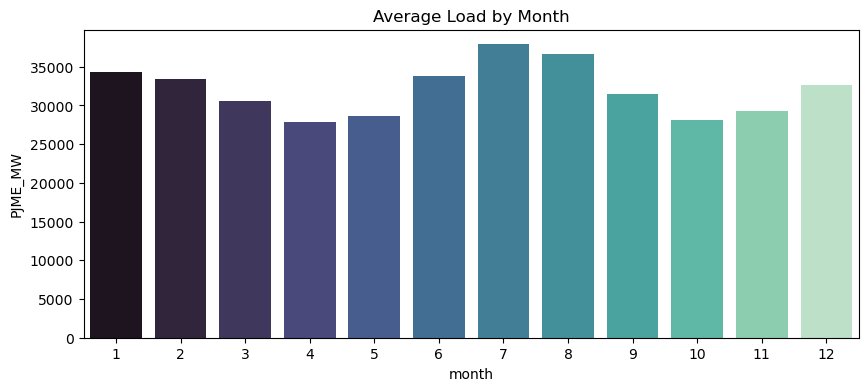

In [19]:
plt.figure(figsize=(10,4))
sns.barplot(x='month', y=target_col, data=df, estimator='mean', ci=None, palette='mako')
plt.title('Average Load by Month')
plt.show()


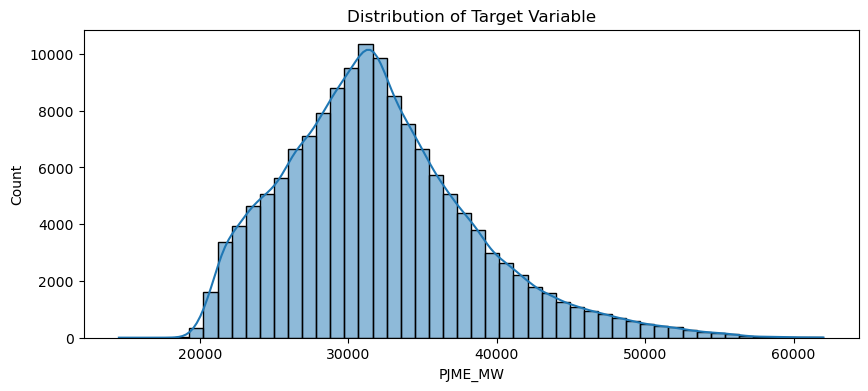

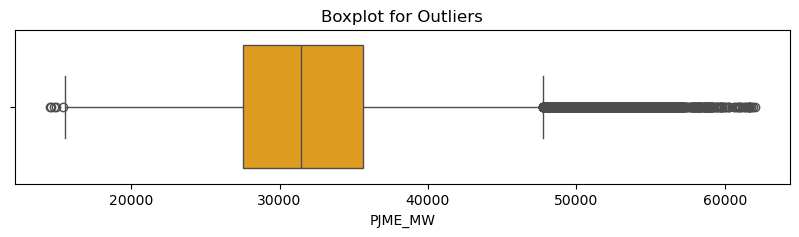

In [20]:
plt.figure(figsize=(10,4))
sns.histplot(df[target_col], kde=True, bins=50)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(x=df[target_col], color='orange')
plt.title('Boxplot for Outliers')
plt.show()


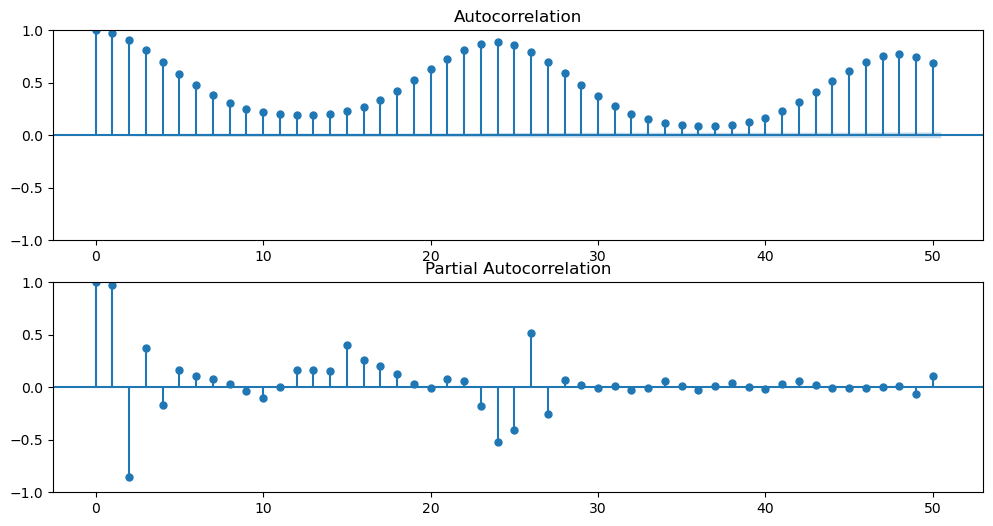

In [21]:
fig, ax = plt.subplots(2,1, figsize=(12,6))
plot_acf(df[target_col], lags=50, ax=ax[0])
plot_pacf(df[target_col], lags=50, ax=ax[1])
plt.show()


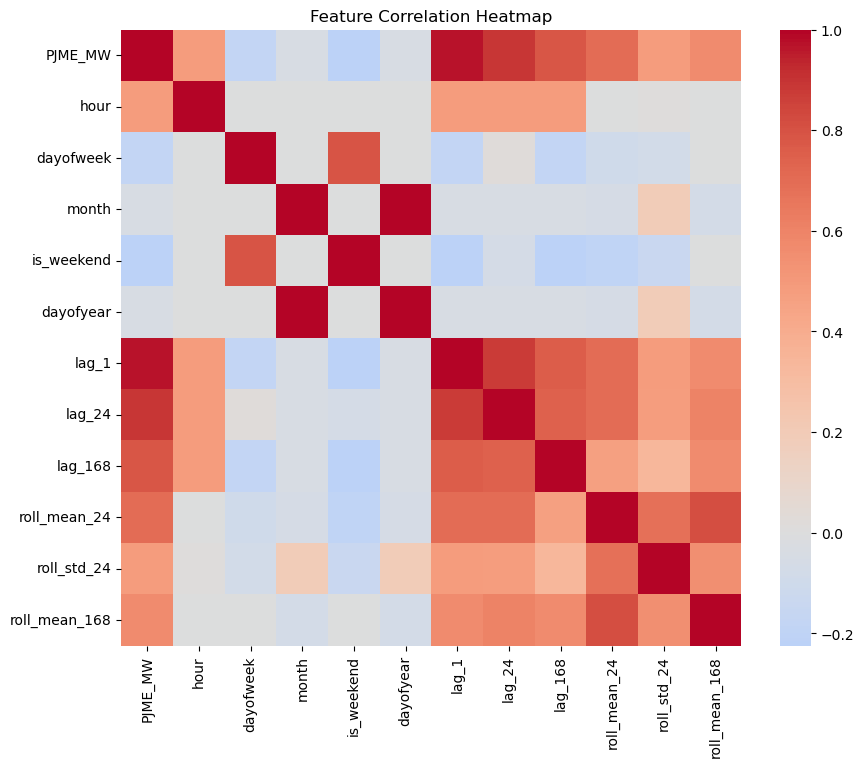

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[target_col])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("✅ Series is stationary.")
else:
    print("⚠️ Series is non-stationary (trend or seasonality present).")


ADF Statistic: -19.95105560732495
p-value: 0.0
✅ Series is stationary.
